## ANLY 590 HW2
### 1
(1) draw a network with 2 inputs, 1 hidden layers with 3 hidden units and 1 class output

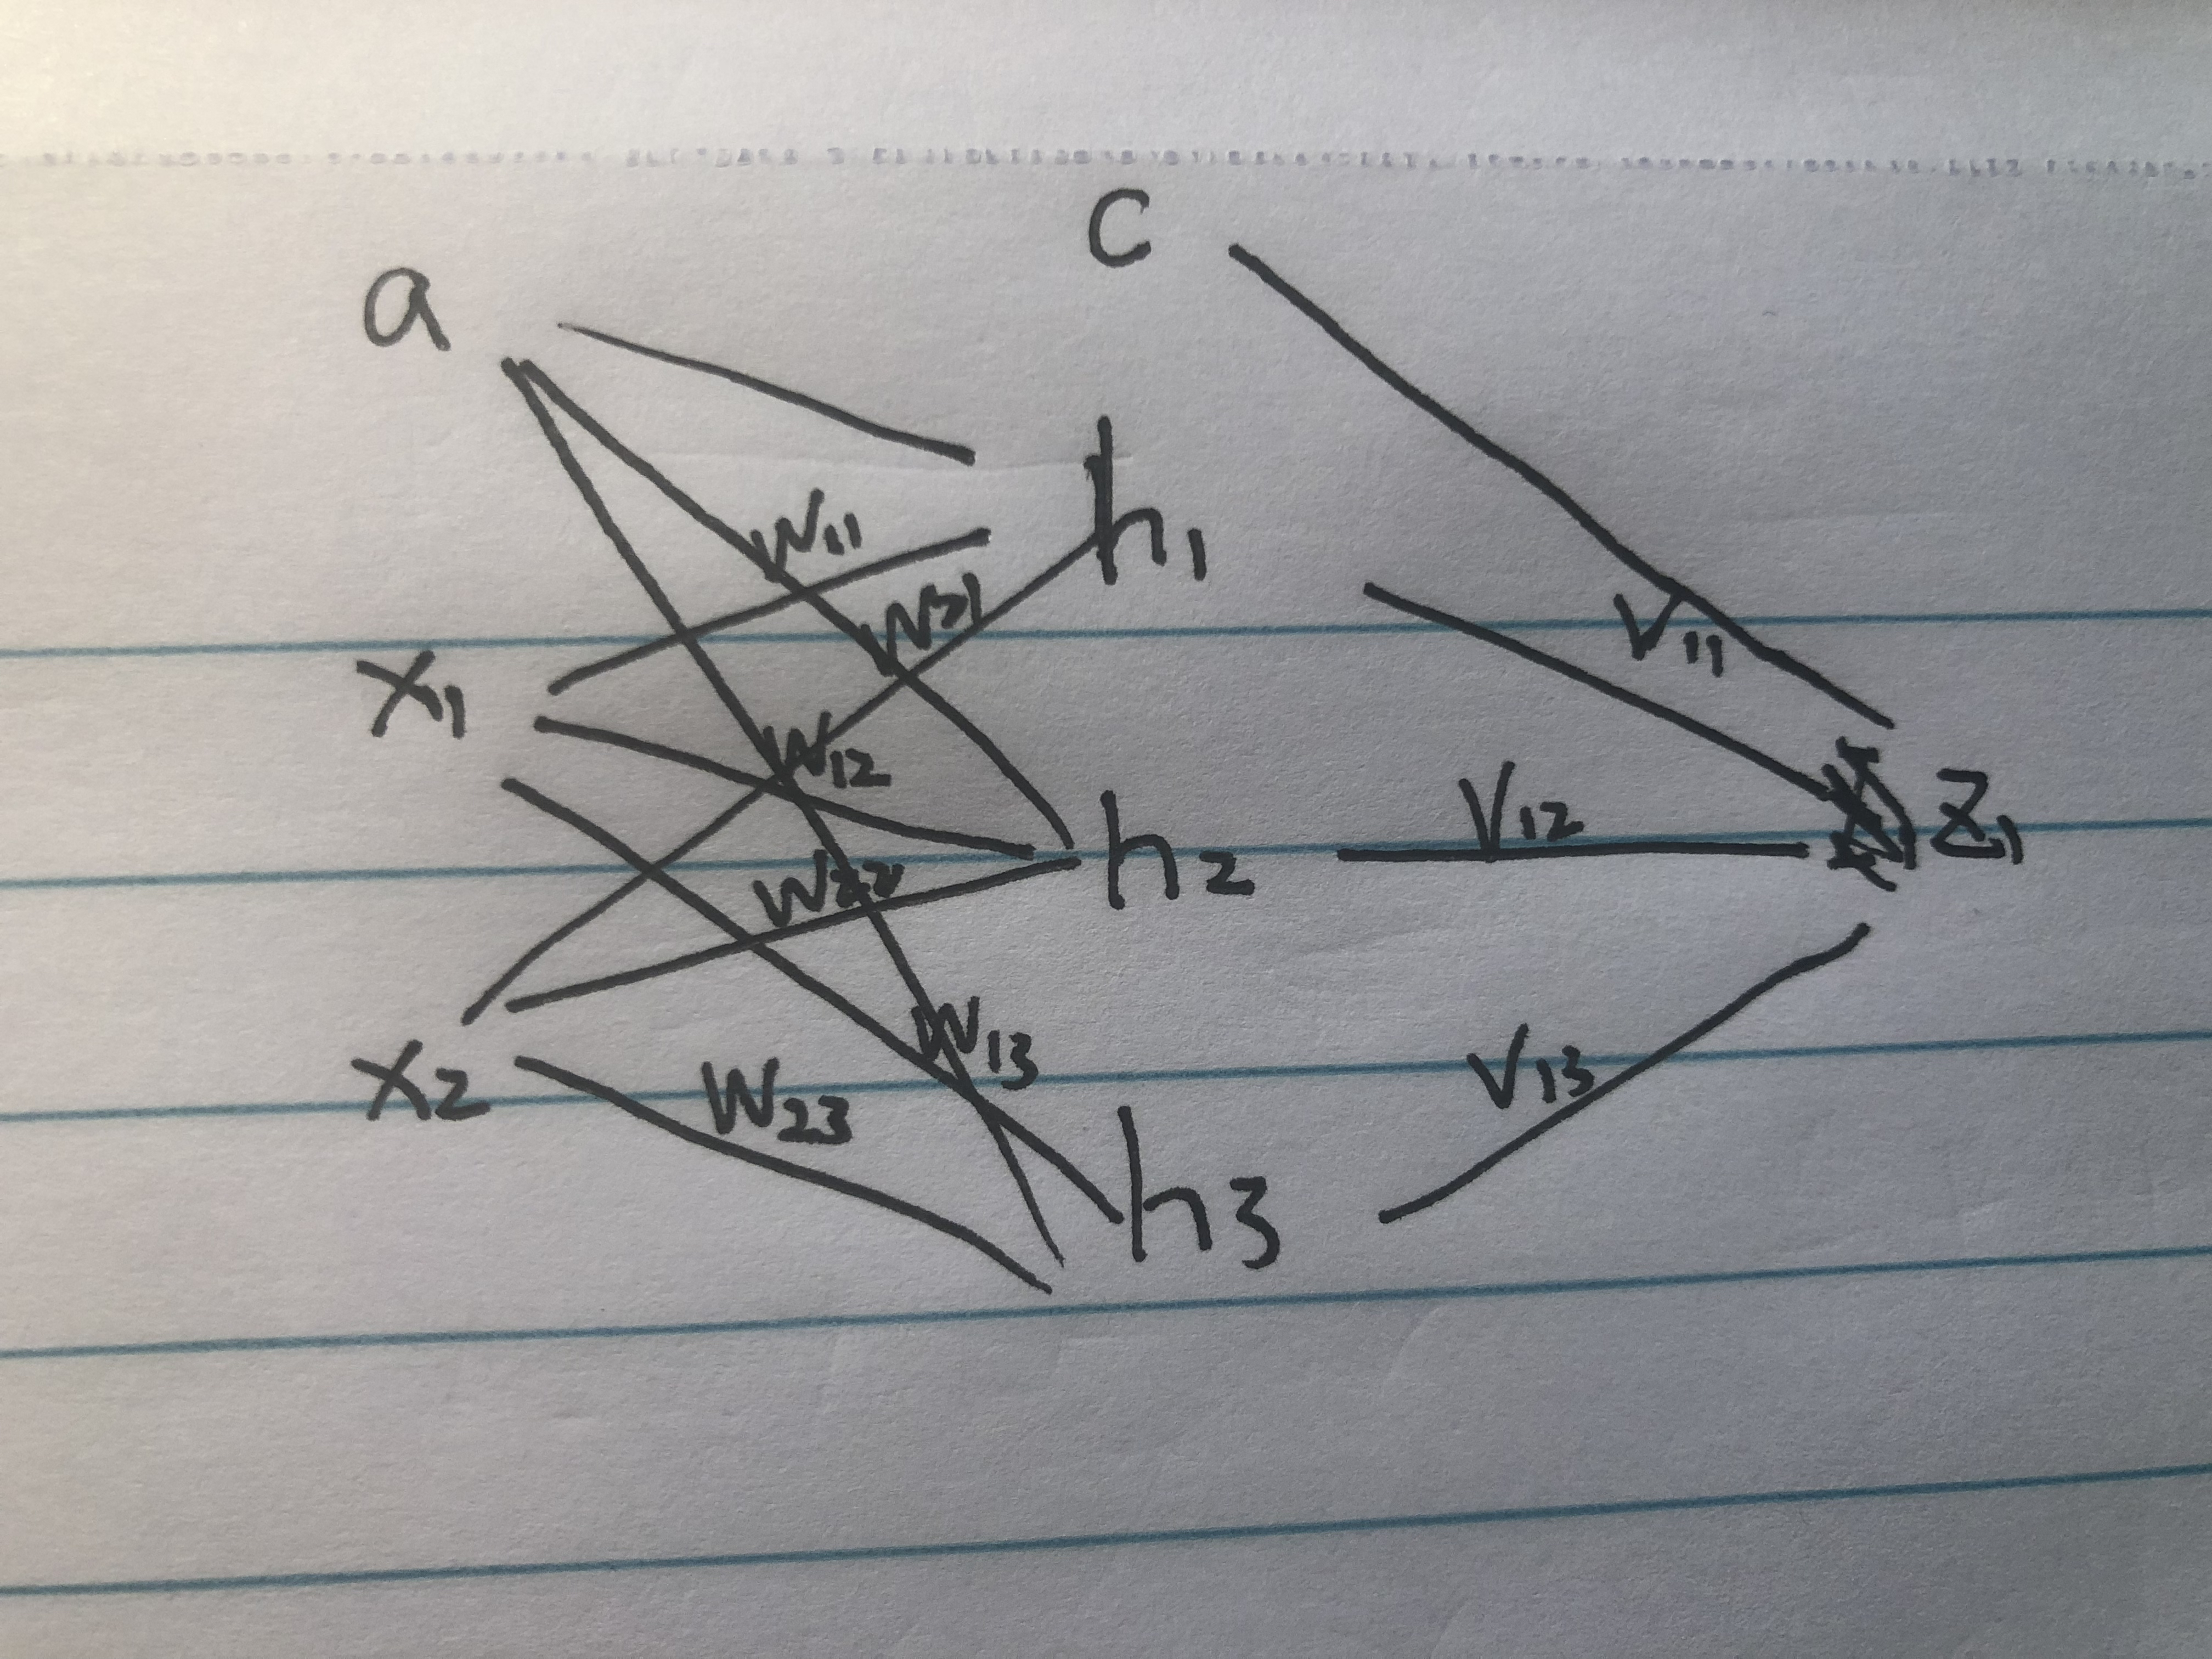

In [98]:
from IPython.display import Image
Image(filename='p1.jpg',width=400,height=400)

(2) write out the mathematical equation for the output of this network. 

$$
h_{1} = max(0,w^{(1)}_{11}x_1+w^{(1)}_{21}x_2+a_{11})
$$

$$
h_{2} = max(0,w^{(1)}_{12}x_1+w^{(1)}_{23}x_2+a_{12})
$$

$$
h_{3} = max(0,w^{(1)}_{13}x_1+w^{(1)}_{23}x_2+a_{13})
$$

$$
z_1 = \sigma(v_{11}h_{11}+v_{21}h_{12}+v_{31}h_{31}+c)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
(3)
def Relu(v):
    return(np.maximum(0,v))
def sigmoid(vector):
    return 1/(1+np.exp(-vector))
def ff_nn_Relu(input_vector,W,V,bias1,c):
    h1 = Relu(X.dot(W)+bias1.T)
    z1 = sigmoid(h1.dot(V)+c)
    return z1.T

In [4]:
W = np.array([[1,-1,0],[0,0,0.5]])
b = np.array([0,0,1]).reshape(3,1)
V = np.array([1,0,-1]).reshape(3,1)
c = np.array([1])
X = np.array([[1,-1],[0,-1],[0,1]])
print("the class probabilities associated with the forward pass of each sample is\n",ff_nn_Relu(X,W,V,b,c))

the class probabilities associated with the forward pass of each sample is
 [[0.81757448 0.62245933 0.37754067]]


### 2
(1) what are the partial derivatives of f with respect to x and to y?
\begin{align}
\frac{\partial f}{\partial x} &= -3x^2+200x-200y^2\\
\frac{\partial f}{\partial y} &= 400y^3-400xy
\end{align}

(2) create a visualization of the contours of this function?

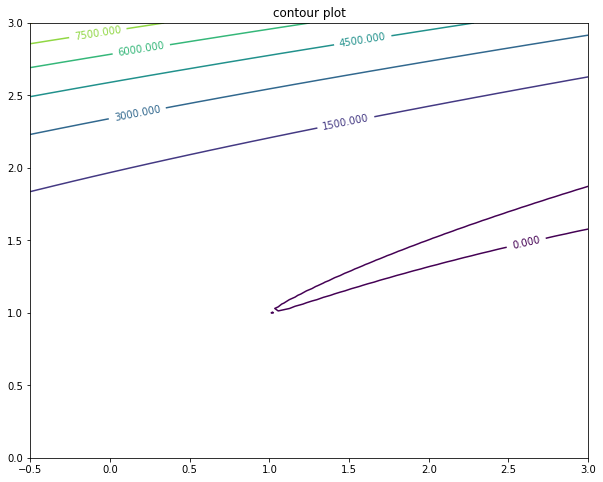

In [5]:
def contours():
    xlist = np.linspace(-0.5,3.0,100)
    ylist = np.linspace(0,3.0,100)
    X,Y = np.meshgrid(xlist,ylist)
    F = (1-X**3)+100*(Y**2-X)**2
    fig = plt.figure(figsize = (10,8))
    ax = plt.subplot()
    cp = ax.contour(X,Y,F)
    ax.clabel(cp,inline = True, fontsize = 10)
    ax.set_title('contour plot')
    plt.show()
    
    
contours()
    

(3) write a gradient descent algorithm for finding the minimum of the function. Visualize your result with a few differnet learning rates

In [6]:
def f(x):
    return (1-x[0]**3)+100*(x[1]**2-x[0])**2

def grad_f(x):
    df_dx = -3*x[0]**2+200*x[0]-200*x[1]**2
    df_dy = 400*x[1]**3-400*x[0]*x[1]
    return np.array([df_dx,df_dy])

def minimum(x,iters,alpha):
    z = f(x)
    results = [x]
    ct = 0
    while ct <iters:
        x_new = x-alpha*grad_f(x)
        z_new = f(x_new)
        if z_new>z:
            print("iteration {} looks like we went past the minimum,z_new = {},z = {},x_new = {}".format(ct,z_new,z,x_new))
            print("iteration {} returning {} as the minimal".format(ct,x))
            break
        x = x_new
        z = z_new
        results.append(x)
        ct +=1

    print("minimal not found until even after {} iterations".format(ct))
    print("closet we got to the minimal was at {}".format(x))
    
    return results    
    

In [7]:
def graph(iteration, alpha,trajectory):
    xlist = np.linspace(-0.5,3.0,100)
    ylist = np.linspace(0,3.0,100)
    X,Y = np.meshgrid(xlist,ylist)
    F = (1-X**3)+100*(Y**2-X)**2
    fig = plt.figure(figsize = (10,8))
    ax = plt.subplot()
    cs = ax.contour(X,Y,F)
    ax.clabel(cs,inline = True, fontsize = 10)
    x = [X[0] for X in trajectory]
    y = [X[1] for X in trajectory] 
    plt.plot(x,y,'-o',color = 'red')
    x_min = np.round(x[len(x)-1],4)
    y_min = np.round(y[len(x)-1],4)
    annotation = "minimum at("+str(x_min)+','+str(y_min)+")"
    ax.annotate(annotation,xy=(x_min,y_min))
    ax.set_title('Gradient descent with learning rate {} and iterations {}'.format(alpha,iteration))
    plt.show()

#### learning rate is 0.0001

In [8]:
X = np.array([0,2])
alpha = 0.0001
iters = 200
trajectory1 = minimum(X,iters,alpha)

minimal not found until even after 200 iterations
closet we got to the minimal was at [0.51156938 0.71434195]


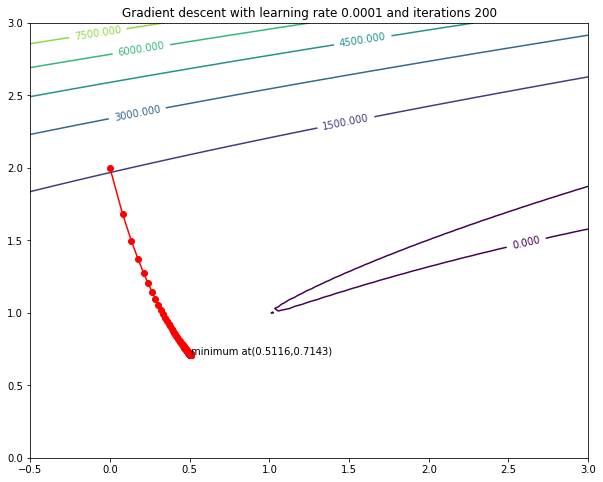

In [9]:
graph(200,0.0001,trajectory1)

#### learning rate is 0.0003

In [10]:
trajectory2 = minimum(X,iters,0.0003)

minimal not found until even after 200 iterations
closet we got to the minimal was at [0.47724752 0.68998099]


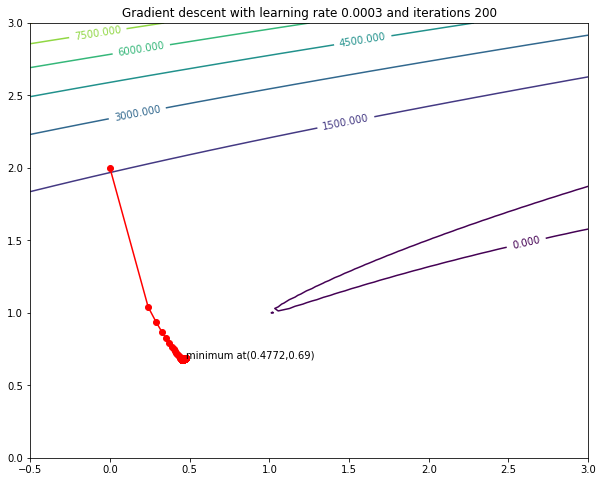

In [11]:
graph(200,0.0003,trajectory2)

#### learning rate with 0.0005

In [12]:
trajectory3 = minimum(X,iters,0.0007)

minimal not found until even after 200 iterations
closet we got to the minimal was at [ 0.22688849 -0.47590323]


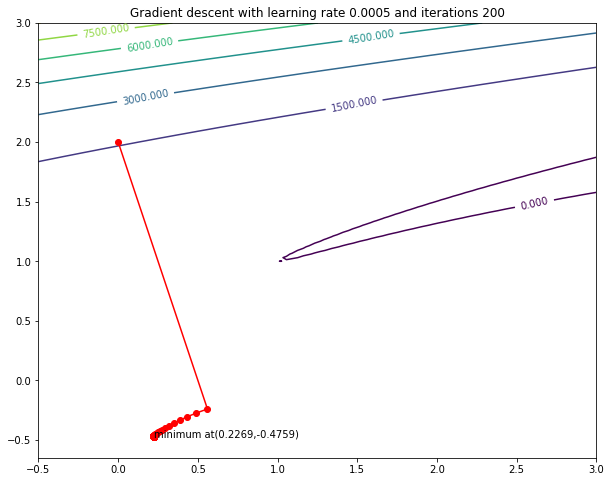

In [13]:
graph(200,0.0005,trajectory3)

(4)Write a Gradient Descent with Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [14]:
def momentum(x,iters,alpha,esp):
    z = f(x)
    results = [x]
    v = np.zeros(x.size)
    ct = 0
    while ct <iters:
        v =alpha*v+esp* grad_f(x)
        x_new = x-v
        z_new = f(x_new)
        if z_new>z:
            print("iteration {} looks like we went past the minimum,z_new = {},z = {},x_new = {}".format(ct,z_new,z,x_new))
            print("iteration {} returning {} as the minimal".format(ct,x))
            break
        x = x_new
        z = z_new
        results.append(x)
        ct +=1

    print("minimal not found until even after {} iterations".format(ct))
    print("closet we got to the minimal was at {}".format(x))
    
    return results    

In [15]:
def graph(iteration, alpha,trajectory):
    xlist = np.linspace(-0.5,3.0,100)
    ylist = np.linspace(0,3.0,100)
    X,Y = np.meshgrid(xlist,ylist)
    F = (1-X**3)+100*(Y**2-X)**2
    fig = plt.figure(figsize = (10,8))
    ax = plt.subplot()
    cs = ax.contour(X,Y,F)
    ax.clabel(cs,inline = True, fontsize = 10)
    x = [X[0] for X in trajectory]
    y = [X[1] for X in trajectory] 
    plt.plot(x,y,'-o',color = 'red')
    x_min = np.round(x[len(x)-1],4)
    y_min = np.round(y[len(x)-1],4)
    annotation = "minimum at("+str(x_min)+','+str(y_min)+")"
    ax.annotate(annotation,xy=(x_min,y_min))
    ax.set_title('Gradient descent with learning rate {} and iterations {}'.format(alpha,iteration))
    plt.show()

## alpha = 0.0001 esp = 0.0001

In [16]:
X = np.array([0,2])
alpha = 0.0001
iters = 200
tra1 = momentum(X,iters,alpha,0.0001)

minimal not found until even after 200 iterations
closet we got to the minimal was at [0.51156676 0.71434012]


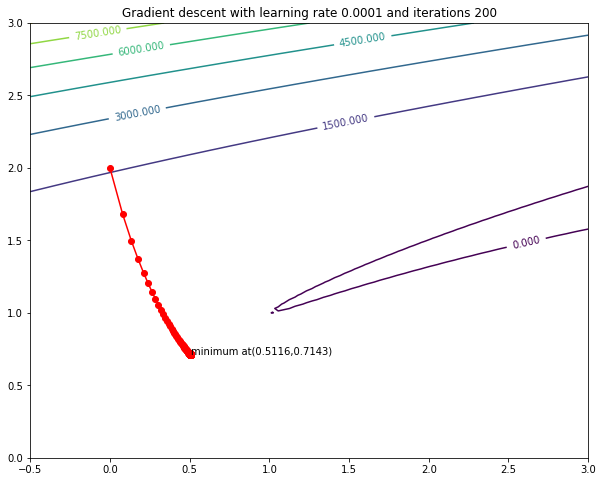

In [17]:
graph(200,0.0001,tra1)

## alpha = 0.0005, esp = 0.0005

minimal not found until even after 200 iterations
closet we got to the minimal was at [0.28063782 0.5292273 ]


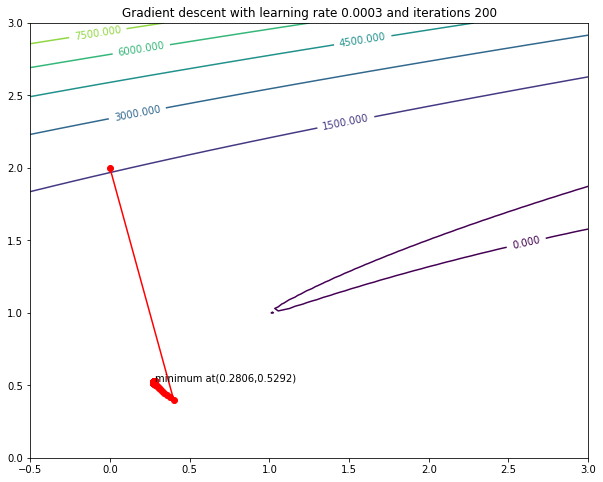

In [18]:
tra2 = momentum(X,iters,0.0005,0.0005)
graph(200,0.0003,tra2)

## alpha = 0.01, esp = 0.0003

minimal not found until even after 200 iterations
closet we got to the minimal was at [0.47549055 0.68871083]


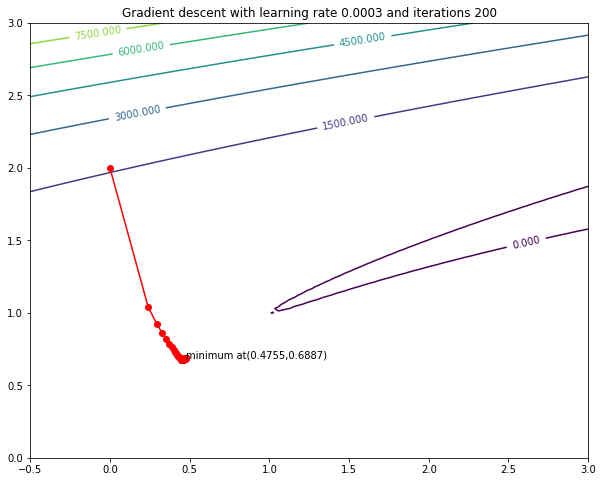

In [19]:
tra3 = momentum(X,iters,0.01,0.0003)
graph(200,0.0003,tra3)

## Problem 3 Backprop

\begin{align}
h_{11} = max(0,w^{(1)}_{11}x_1+w^{(1)}_{12}x_2+b_{11})\\
h_{12} = max(0,w^{(1)}_{21}x_1+w^{(1)}_{22}x_2+b_{12})\\
h_{13} = max(0,w^{(1)}_{31}x_1+w^{(1)}_{32}x_2+b_{13})\\
\hat{y} = \sigma(v_{11}h_{11}+v_{21}h_{12}+v_{31}h_{31}+c)\\
\text{loss function}\\
L = -ylog(\hat{y})-(1-y)log(1-\hat{y})
\end{align}

$$
\frac{\partial f}{\partial v_{1i}} = \frac{\partial f}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial v_{11}}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})h_{1i}
$$

$$
\frac{\partial f}{\partial c} = \frac{\partial f}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial c}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})
$$

$$
\frac{\partial f}{\partial w_{ji}} = \frac{\partial f}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial h}\frac{\partial h}{\partial w}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_{ji}x_{i} \text{  if  } w^{(1)}_{11}x_1+w^{(1)}_{12}x_2+b_{11}>0
$$

$$
\text{else } \frac{\partial f}{\partial w_{ji}}=0
$$

$$
\frac{\partial f}{\partial b_{1j}} = \frac{\partial f}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial h}\frac{\partial h}{\partial b_{1j}}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_{ji} \text{  if }w^{(1)}_{11}x_1+w^{(1)}_{12}x_2+b_{11}>0
$$

$$
\text{else } \frac{\partial f}{\partial b_{1j}}=0
$$

(2) Write a function grad_f() that takes in a weights vector and returns the gradient of the loss at that location

In [20]:
def Relu(v):
    return(np.maximum(0,v))
def grad_loss(y,yhat):
    return -y/yhat+(1-y)/(1-yhat)
def grad_sigmoid(s):
    #s = 1/(1+np.exp(-vector))
    return s*(1-s)
def grad_f(y,x,v,bias1,c,w):
    h1 = Relu(x.dot(w)+bias1)
    yhat = sigmoid(h1.dot(v)+c)
    partialv = grad_loss(y,yhat)*grad_sigmoid(yhat)*h1
    partialc = grad_loss(y,yhat)*grad_sigmoid(yhat)
    #partialw = grad_loss(y,yhat)*grad_sigmoid(yhat)*v*x
    #partialb = grad_loss(y,yhat)*grad_sigmoid(yhat)*v
    a = x.dot(w)+bias1
    partialw = np.zeros(shape=(3,2))
    partialb = np.zeros(shape=(3,1))
    for j in range(len(a)):
            if a[j]<0:
                partialw[j][0] = 0
                partialw[j][1] = 0
                partialb[j] = 0
                continue
            else:
                partialw[j] = grad_loss(y,yhat)*grad_sigmoid(yhat)*v[j]*x
                partialb[j] = grad_loss(y,yhat)*grad_sigmoid(yhat)*v[j]

    return (partialv,partialc,partialw,partialb)
    

In [21]:
W = np.array([[1,-1,0],[0,0,0.5]])
b = np.array([0,0,1])
V = np.array([1,0,-1])
c = np.array([1])
X = np.array([1,-1])
dv,dc,dw,db = grad_f(1,X,V,b,c,W)
dv,dc,dw,db

(array([-0.18242552, -0.        , -0.09121276]),
 array([-0.18242552]),
 array([[-0.18242552,  0.18242552],
        [ 0.        ,  0.        ],
        [ 0.18242552, -0.18242552]]),
 array([[-0.18242552],
        [ 0.        ],
        [ 0.18242552]]))

(3) Generate a synthetic dataset like the XOR pattern

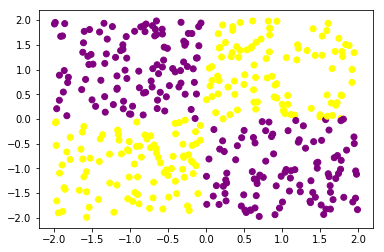

In [35]:
N = 400
rd.seed(123)
ran = np.random.uniform(-2,2,N*2).reshape(N,2)
z = []
for i in range(N):
    if ran[i][0]*ran[i][1]<0:
        z.append('purple')
    else:
        z.append('yellow')
plt.scatter(ran[:,0],ran[:,1],color = z)

(4) fit your network using gradient Descent,keep track the total loss at each iteration and plot the result

In [36]:
def forward(x,w,b,y,c,v):
    #input of hidden layer
    h1 = np.dot(w.T,x)+b
    #output of hidden layer
    a1 = np.maximum(0,h1)
    #input of output layer
    z1 = np.dot(a1.T,v)+c
    #output 
    a2 = sigmoid(z1)
    return h1,a1,z1,a2
def loss(y,yhat):
    return -y*np.log(yhat)-(1-y)*np.log(1-yhat)

In [60]:
def gradient_ann(y,X,w,b,v,c,lr,iterations):
    
    ## used for storing the total loss for each iteration
    losses= []
  
    
    for i in range(0,iterations):
        ### for each iteration, initializing the dw=db=dc=dv=0
        dw = np.zeros(shape=(3,2))
        db = np.zeros(shape=(3))
        dc = 0
        dv = np.zeros(shape=(3))
        
        ## sum of the binary loss of each input xi
        sumloss = 0
        y_hat = [] # only for final usage
        
        ### for each input (x,y), compute the partial derivative
        for m in range(0,len(y)):
            
            ## do the forward
            h,a,z,yhat = forward(X[m],w,b,y[m],c,v)
            ## add the loss
            sumloss += loss(y[m],yhat)
            
            ##### compute the partial derivative ####
            
            #### dl/dv
            dv += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*a

            ##### dl/dc
            dc += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)

            ### whether h[j]>0, if h[j]<0, dwj=0
            for j in range(0,3):
                if h[j]>0:
                    dw[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]*X[m]
                    db[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]
            
            ## for final iteration use
            y_hat.append(yhat)
        
        ### append to loss
        losses.append(sumloss)
        
        ### take the average of partial derivative, update the parameters 
        w = w-lr*dw.T/len(y)
        v = v-lr*dv/len(y)
        c= c-lr*dc/len(y)
        b= b-lr*db/len(y)
        #print(w,v,c,b)
    return losses,y_hat

In [112]:
#set the initial parameter
rd.seed(124)
w = np.random.randn(6).reshape((2,3))
b = np.random.randn(3).reshape(3)
v = np.random.randn(3).reshape(3)
c=np.random.randn(1)
y = [1]*N
for i in range(0,N):
    if z[i]=='purple':
        y[i]=0
lr = 0.12
iterations=1000

In [113]:
import numpy.random as rd
np.zeros((11,1))
losses,yhat =  gradient_ann(y,ran,w,b,v,c,lr,iterations)

Text(0,0.5,'Total Loss')

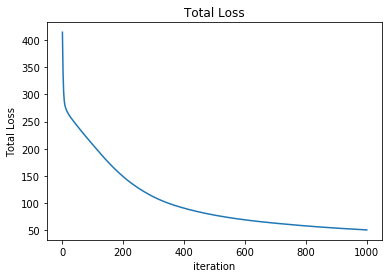

In [114]:
plt.plot(np.arange(1,iterations+1),losses)
plt.title('Total Loss')
plt.xlabel('iteration')
plt.ylabel('Total Loss')

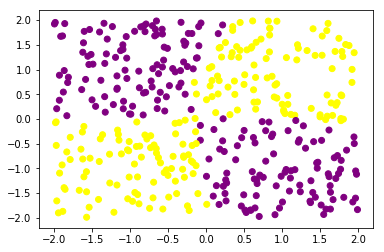

In [115]:
yclass=['yellow']*N
for i in range(0,N):
    if yhat[i]<0.5:
        yclass[i]= 'purple'
plt.scatter(ran[:,0],ran[:,1],color=yclass)

### 5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently

In [116]:
def gradient_ann_mon(y,X,w,b,v,c,lr,eps,iterations):
    
    ## used for storing the total loss for each iteration
    losses= []
    #d_new is the updates
    dw_new = np.zeros(shape=(3,2))
    db_new = np.zeros(shape=(3))
    dc_new = 0
    dv_new = np.zeros(shape=(3))
    
    for i in range(0,iterations):
        ### for each iteration, initializing the dw=db=dc=dv=0
        dw = np.zeros(shape=(3,2))
        db = np.zeros(shape=(3))
        dc = 0
        dv = np.zeros(shape=(3))
        
        ## sum of the binary loss of each input xi
        sumloss = 0
        y_hat = [] # only for final usage
        
        ### for each input (x,y), compute the partial derivative
        for m in range(0,len(y)):
            
            ## do the forward
            h,a,z,yhat = forward(X[m],w,b,y[m],c,v)
            ## add the loss
            sumloss += loss(y[m],yhat)
            
            ##### compute the partial derivative ####
            
            #### dl/dv
            dv += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*a

            ##### dl/dc
            dc += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)

            ### whether h[j]>0, if h[j]<0, dwj=0
            for j in range(0,3):
                if h[j]>0:
                    dw[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]*X[m]
                    db[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]
            
            ## for final iteration use
            y_hat.append(yhat)
        
        ### append to loss
        losses.append(sumloss)
        #update 
        dw_new = alpha*dw_new+eps*dw/len(y)
        dv_new = alpha*dv_new+eps*dv/len(y)
        dc_new = alpha*dc_new+eps*dc/len(y)
        db_new = alpha*dv_new+eps*db/len(y)
        ### take the average of partial derivative, update the parameters 
        w = w-dw_new.T
        v = v-dv_new
        c= c-dc_new
        b= b-db_new
        #print(w,v,c,b)
    return losses,y_hat

In [117]:
eps = lr
alpha = 0.5
losses2, yhat2 = gradient_ann_mon(y,ran,w,b,v,c,alpha,eps,iterations)

Text(0,0.5,'Total Loss')

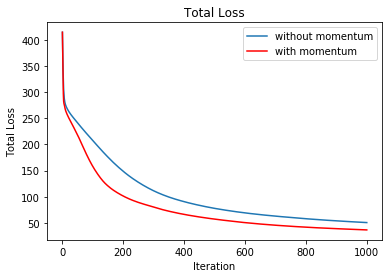

In [118]:
plt.plot(np.arange(1,iterations+1),losses,label = 'without momentum')
plt.plot(np.arange(1,iterations+1),losses2,label = 'with momentum',color = 'red')
plt.legend()
plt.title('Total Loss')
plt.xlabel('Iteration')
plt.ylabel('Total Loss')

### when keeping the same learning rate, gradient descent with momentum converges more efficiently

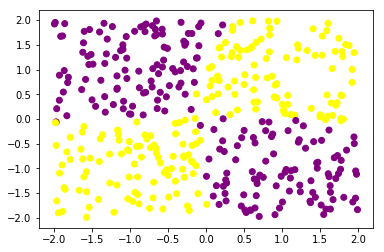

In [119]:
yclass2 = ['purple']*N
for i in range(N):
    if yhat2[i]>0.5:
        yclass2[i] = 'yellow'
plt.scatter(ran[:,0],ran[:,1],color = yclass2)

## 6 plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

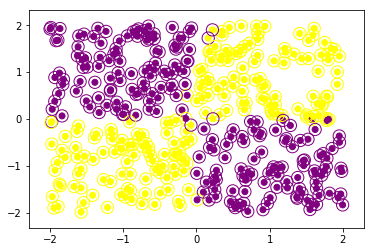

In [120]:
plt.scatter(ran[:,0],ran[:,1],color=z)
plt.scatter(ran[:,0],ran[:,1],color = '', edgecolors = yclass2,label = 'o',s = 150)
plt.show()